# 28. Matplotlib Basic 

# Basic Plotting with matplotlib

## matplotlib 은 두가지 style 로 사용 가능

1. Functional Programing Style  
```
import matplotlib.pyplot as plt  
plt.plot(x, y)
```

2. OOP stype
```
fig, ax = plt.subplots()  
ax.plot(x, y)
```

**matlab style (pylab) 은 더이상 사용하지 않음**

**pyplot 의 object 구성**

<center><img src="fig_map.webp" width="350"/></center>

## Functional Programming Style

In [2]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
# #한글 폰트 사용
# from matplotlib import font_manager
# import matplotlib
# font_path = "C:/Windows/Fonts/H2GTRM.TTF"   #폰트 경로
# #폰트 이름 얻어오기
# font_name = font_manager.FontProperties(fname=font_path).get_name()  
# matplotlib.rc('font', family=font_name)             #font 지정
# #한글사용시 마이너스 사인 깨짐 방지
# matplotlib.rcParams['axes.unicode_minus'] = False               

### 점찍기

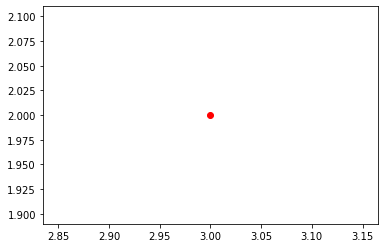

In [3]:
plt.figure()
plt.plot(3, 2, 'o', c='r')
plt.show()

### 선긋기

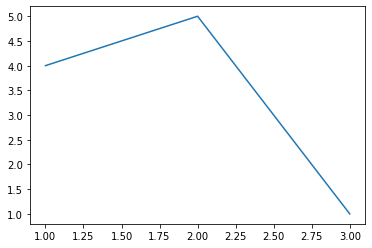

In [4]:
plt.figure()
plt.plot([1,2,3],[4,5,1])
plt.show()

### figure size 조절

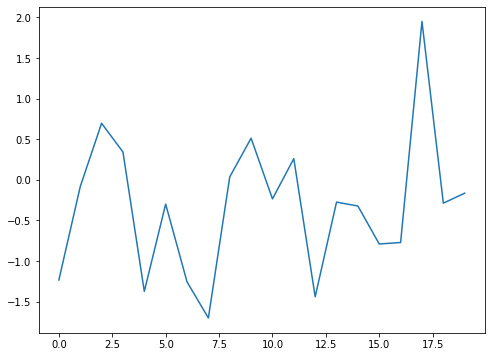

In [5]:
plt.figure(figsize=(8, 6))
y = np.random.randn(20)
x = range(len(y))
plt.plot(x, y);

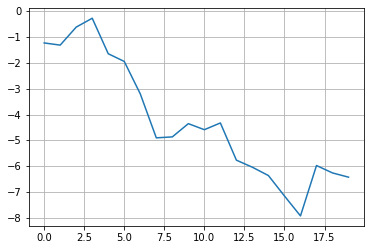

In [6]:
# plt.figure() 생략하면 default size 로 자동 생성

plt.plot(y.cumsum())   # x value 를 생략하면 y 의 index 가 default x 
plt.grid(True)

### title, label 추가

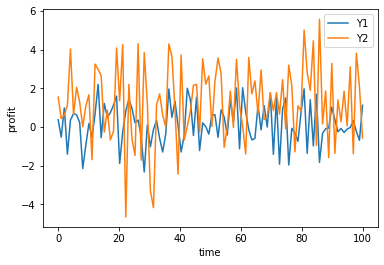

In [9]:
X1 = np.linspace(0, 100, 100)
X2 = np.linspace(0, 100, 100)
# mean 0, std 1 인 100 개의 normal distribution
Y1 = np.random.normal(0, 1, 100)  
# mean 1, std 2 인 100 개의 normal distribution
Y2 = np.random.normal(1, 2, 100)

plt.plot(X1, Y1);
plt.plot(X2, Y2);
plt.xlabel('time')          
plt.ylabel('profit')
plt.legend(['Y1', 'Y2']);

### 한글 label, 범례 (legend), title 추가

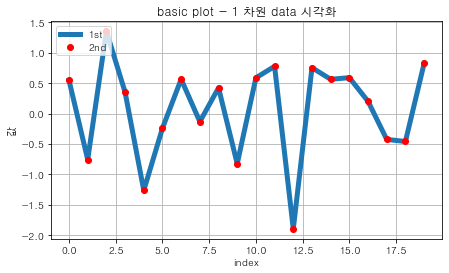

In [16]:
z = np.random.randn(20)

plt.figure(figsize=(7, 4))
plt.plot(z, lw=5, label='1st')
plt.plot(z, 'ro', label='2nd')
plt.grid(True)
plt.xlabel('index')
plt.ylabel('값')
plt.legend(loc=2)
plt.title("basic plot - 1 차원 data 시각화");

### bar chart

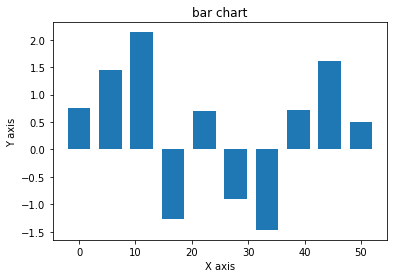

In [10]:
X = np.linspace(0, 50, 10)
Y = np.random.normal(0, 1, 10)  

plt.bar(X, Y, width=4)

plt.title('bar chart')
plt.ylabel('Y axis')
plt.xlabel('X axis')

plt.show()

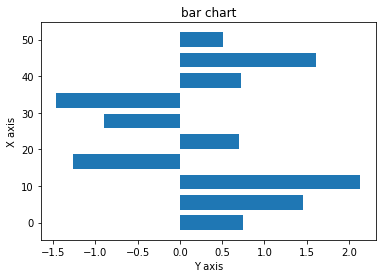

In [11]:
plt.barh(X, Y, height=4)

plt.title('bar chart')
plt.ylabel('X axis')
plt.xlabel('Y axis')

plt.show()

### scatter plot (산점도)

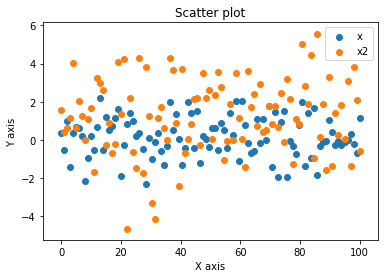

In [12]:
plt.scatter(X1, Y1, label='x')
plt.scatter(X2, Y2, label='x2')

plt.title('Scatter plot')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.legend()

## OOP style

## multiple subplots

- 2 차원 dataset

In [13]:
y = np.random.randn(20, 2);

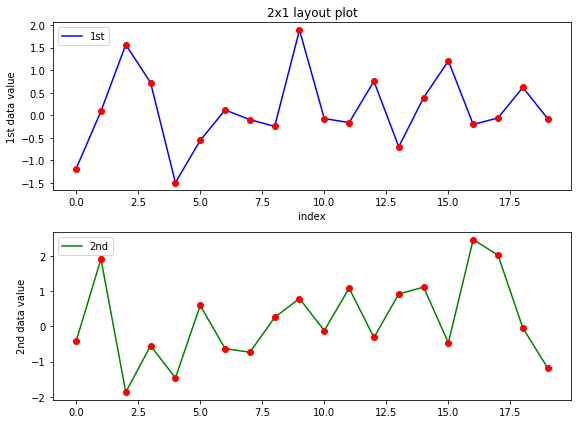

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(y[:, 0], 'b', label='1st')
ax1.plot(y[:, 0], 'ro')
ax1.set_xlabel('index')
ax1.set_ylabel('1st data value')
ax1.set_title('2x1 layout plot')
ax1.legend(loc=2);

ax2.plot(y[:, 1], 'g', label='2nd')
ax2.plot(y[:, 1], 'ro')
ax2.set_ylabel('2nd data value')
ax2.legend(loc=2);

plt.tight_layout()

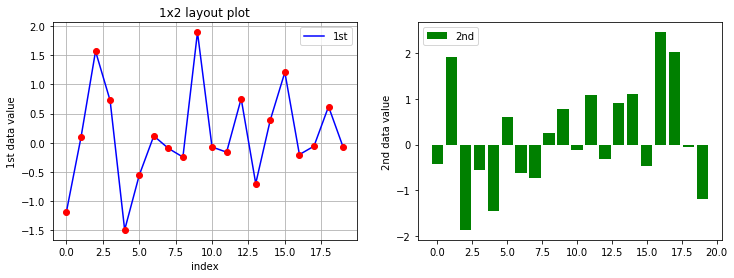

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(y[:, 0], 'b', label='1st')
ax1.plot(y[:, 0], 'ro')
ax1.set_xlabel('index')
ax1.set_ylabel('1st data value')
ax1.grid(True)
ax1.set_title('1x2 layout plot')
ax1.legend(loc=1);

ax2.bar(np.arange(len(y)), y[:, 1], color='g', label='2nd')
ax2.set_ylabel('2nd data value')
ax2.legend(loc=2);

### axis 공유

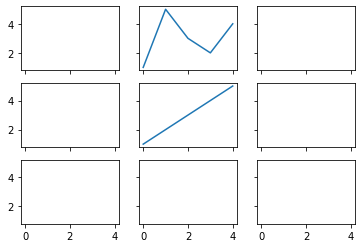

In [37]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
ax2.plot(np.array([1, 5, 3, 2, 4]))
ax5.plot(np.array([1, 2, 3, 4, 5]))

## histogram

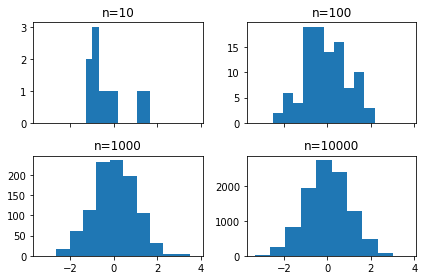

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10 ** (n+1)
    sample = np.random.randn(sample_size)
    axs[n].hist(sample, bins=10)
    axs[n].set_title(f'n={sample_size}')
    
plt.tight_layout()

### Box and Whisker Plots (상자 수염 그림) 

- 5가지 통계 요약 수치 (최솟값, 제 1사분위, 제 2사분위, 제 3사분위, 최댓값) 로 작성

In [39]:
import pandas as pd

normal_sample1 = np.random.normal(loc=0.0, scale=1.0, size=10000)
normal_sample2= np.random.normal(loc=10.0, scale=2.0, size=10000)
random_sample = np.random.random(10000)

df = pd.DataFrame({'normal1': normal_sample1, 
                               'normal2': normal_sample2,
                               'random': random_sample})
df.head()

,normal1,normal2,random
0,1.235303,8.969160,0.911796
1,-0.452887,8.772491,0.884876
2,-1.738004,10.019392,0.019651
3,-1.288881,5.553413,0.963702
4,-0.149269,10.559160,0.269632


In [40]:
df.describe()

,normal1,normal2,random
count,10000.000000,10000.000000,10000.000000
mean,0.015817,9.992820,0.496063
std,1.018523,1.998607,0.287976
min,-3.603200,1.880346,0.000088
25%,-0.669713,8.642301,0.246481
50%,0.014234,9.999102,0.493827
75%,0.698471,11.331063,0.745418
max,3.813285,18.425018,0.999900


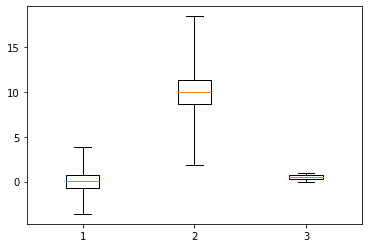

In [41]:
plt.figure()
plt.boxplot([df['normal1'], df['normal2'], df['random']], whis='range')
None

## 연습문제

### Data Science 분야에 대한 관심도 조사 결과를 시각화

In [43]:
df_survey = pd.read_csv('Topic_Survey_Assignment.csv', index_col=0)
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


### 1 단계 - 관심도 높은 순서로 정렬

In [ ]:
df_survey.sort_values(%code here%)
df_survey

### 2 단계 - 응답한 숫자를 전체 응답 숫자에 대한 비율로 전환

In [147]:
row_sum = df_survey.sum(%code here%)
row_sum

Data Analysis / Statistics    2192
Machine Learning              2180
Data Visualization            2176
Big Data (Spark / Hadoop)     2188
Deep Learning                 2169
Data Journalism               2120
dtype: int64

In [153]:
df_survey = round(df_survey.divide(%code here%) * 100, 2)
df_survey

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,77.01,20.26,2.74
Machine Learning,74.72,21.88,3.39
Data Visualization,61.58,33.73,4.69
Big Data (Spark / Hadoop),60.88,33.32,5.80
Deep Learning,58.23,35.50,6.27
Data Journalism,20.24,50.99,28.77


### 3 단계 - 조사 분야별로 bar chart 작성하여 비교

In [174]:
categories = df_survey.index
categories

Index(['Data Analysis / Statistics', 'Machine Learning', 'Data Visualization',
       'Big Data (Spark / Hadoop)', 'Deep Learning', 'Data Journalism'],
      dtype='object')

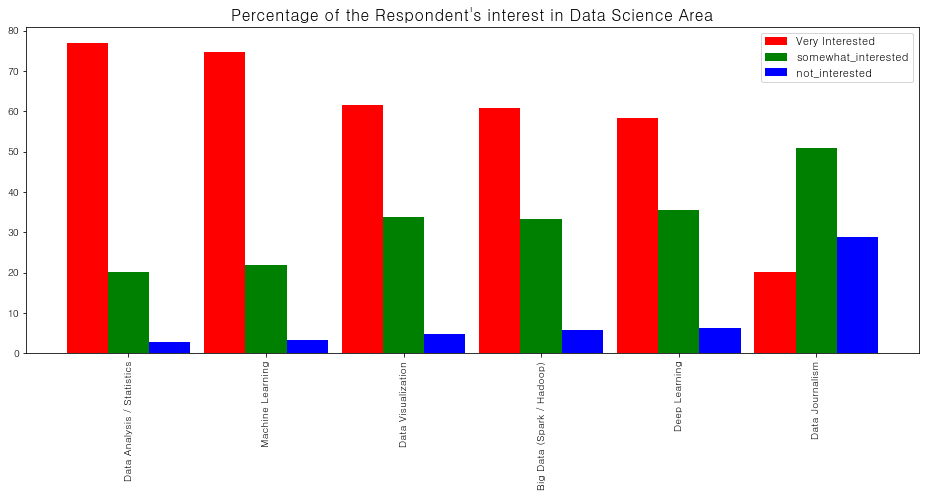

In [187]:
fig, ax = plt.subplots(figsize=(16, 6))

index = np.arange(len(df_survey))

very_interested = df_survey.iloc[:, 0].values
somewhat_interested = %code here%
not_interested = %code here%

ax.bar(index, very_interested, width=0.3, color='red', label="Very Interested")
ax.bar(index+0.3, somewhat_interested, width=0.3, color='green', tick_label=categories, label="somewhat_interested")
ax.bar(%code here%)

ax.set_title("Percentage of the Respondent's interest in Data Science Area", fontsize=16)
ax.set_xticklabels(categories, rotation=90)

plt.legend(fontsize=11)